# Minnesota Crime Data
----
- Crime data by police dept for each year: 2012-2014
- Crime data by neighborhood in Mpls for years 2017-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mpls neighborhood crime data
mpls_crime = pd.read_csv("Resources/Minneapolis_NEIGHBORHOOD_CRIME_STATS.csv")

# MN crime data by jurisdiction (2014, 2013, 2012)
mn_crime_2014 = pd.read_csv("Resources/MN_crime_data_2014.csv", header=8, skipfooter=19, engine='python')
mn_crime_2013 = pd.read_csv("Resources/MN_crime_data_2013.csv", header=8, skipfooter=19, engine='python')
mn_crime_2012 = pd.read_csv("Resources/MN_crime_data_2012.csv", header=8, skipfooter=19, engine='python')

### Pairing down the data for crime by police dept in mn for each year

In [2]:
# Scale down number of columns
columns_of_interest = \
['Agency',
 'Population',
 'Real Violent Crime Total',
 'Real Violent Crime Rate',
 'Property crime total',
 'Property crime rate',
 'Crime Total',
 'Crime Rate']

new_column_names = \
[
    'Agency',
    'Population',
    'VC_Total',
    'VC_Rate',
    'PC_Total',
    'PC_Rate',
    'Crime_Total',
    'Crime_Rate'    
]

In [3]:
# Crime data for 2014

# get violent crime total, then violent crime rate
mn_crime_2014['Real Violent Crime Total'] = mn_crime_2014['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2014['Revised rape /2'] + \
                                            mn_crime_2014['Robbery'] + \
                                            mn_crime_2014['Aggravated assault']

mn_crime_2014['Real Violent Crime Rate'] = mn_crime_2014['Real Violent Crime Total'] / \
                                           (mn_crime_2014['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2014['Crime Total'] = mn_crime_2014['Property crime total'] + \
                                   mn_crime_2014['Real Violent Crime Total']

mn_crime_2014['Crime Rate'] = mn_crime_2014['Crime Total'] / \
                              (mn_crime_2014['Population'] / 100000)

crime_rates_2014 = mn_crime_2014[columns_of_interest]

# Rename columns
crime_rates_2014.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
#crime_rates_2014.to_csv("Resources/2014_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [4]:
# DO THE SAME FOR 2013

# get violent crime total, then violent crime rate
mn_crime_2013['Real Violent Crime Total'] = mn_crime_2013['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2013['Revised rape /2'] + \
                                            mn_crime_2013['Robbery'] + \
                                            mn_crime_2013['Aggravated assault']

mn_crime_2013['Real Violent Crime Rate'] = mn_crime_2013['Real Violent Crime Total'] / \
                                           (mn_crime_2013['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2013['Crime Total'] = mn_crime_2013['Property crime total'] + \
                                   mn_crime_2013['Real Violent Crime Total']

mn_crime_2013['Crime Rate'] = mn_crime_2013['Crime Total'] / \
                              (mn_crime_2013['Population'] / 100000)

crime_rates_2013 = mn_crime_2013[columns_of_interest]

# Rename columns
crime_rates_2013.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
#crime_rates_2013.to_csv("Resources/2013_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [5]:
# DO THE SAME FOR 2012

# get violent crime total, then violent crime rate
mn_crime_2012['Real Violent Crime Total'] = mn_crime_2012['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2012['Revised rape /2'] + \
                                            mn_crime_2012['Robbery'] + \
                                            mn_crime_2012['Aggravated assault']

mn_crime_2012['Real Violent Crime Rate'] = mn_crime_2012['Real Violent Crime Total'] / \
                                           (mn_crime_2012['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2012['Crime Total'] = mn_crime_2012['Property crime total'] + \
                                   mn_crime_2012['Real Violent Crime Total']

mn_crime_2012['Crime Rate'] = mn_crime_2012['Crime Total'] / \
                              (mn_crime_2012['Population'] / 100000)

crime_rates_2012 = mn_crime_2012[columns_of_interest]

# Rename columns
crime_rates_2012.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
#crime_rates_2012.to_csv("Resources/2012_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [6]:
# Drop rows with NaN values
## Each county's sherrif's office gets dropped
### It's okay because the city police depts are more relevant

crime_rates_2014.dropna(how='any', inplace=True)
crime_rates_2013.dropna(how='any', inplace=True)

# 2012 data doesn't contain violent crime data
crime_rates_2012 = crime_rates_2012.loc[crime_rates_2012['Agency'].str.contains('Sheriff') == False]

C:\Users\Jackmarius\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jackmarius\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# Create dataframe storing avg crime rates, populations for each department

avg_crime_rates = crime_rates_2014.filter(['Agency'], axis=1)

avg_columns = ['Avg_Population', 'Avg_VC', 'Avg_PC', 'Avg_Crime_Rate']

crime_rates_columns = ['Population', 'VC_Rate', 'PC_Rate', 'Crime_Rate']

# tracking index to iterate through avg_columns
index=0

for column in crime_rates_columns:
    
    avg_crime_rates[avg_columns[index]] = (crime_rates_2014[column] + crime_rates_2013[column]) / 2
    
    index += 1
    
avg_crime_rates.reset_index(drop=True, inplace=True)


In [8]:
# Remove extraneous substrings from 'Agency' names

agency_list = []
substrings = [' Police Dept', 'City Of ', ' Safety Dept',
              ' Dept Public Safety', ' City', ' Dept Of Public Safety']


for name in avg_crime_rates.Agency:

    for sub in substrings:
        
        if sub in name:
            
            name = str.replace(name, sub, '')
        
    agency_list.append(name)

# update agency column
avg_crime_rates.Agency = agency_list

# Output as CSV
#avg_crime_rates.to_csv("Resources/2013-2014_MN_Crime_OUTPUT_FILE.csv", index=False)

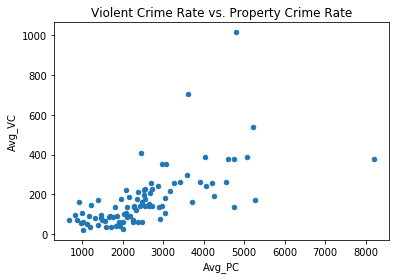

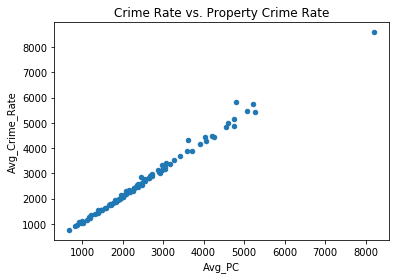

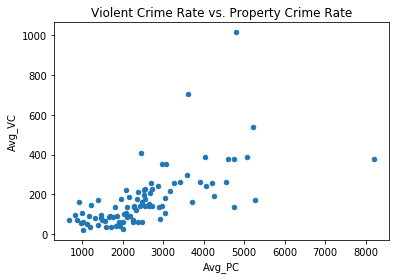

In [9]:
avg_crime_rates.plot(x='Avg_PC', y='Avg_VC', kind='scatter', title='Violent Crime Rate vs. Property Crime Rate')
avg_crime_rates.plot(x='Avg_PC', y='Avg_Crime_Rate', kind='scatter', title='Crime Rate vs. Property Crime Rate')
avg_crime_rates.plot(x='Avg_PC', y='Avg_VC', kind='scatter', title='Violent Crime Rate vs. Property Crime Rate')

### Add in school data

In [10]:
# Read in school data
school_data = pd.read_excel("Resources/CleanedGradFile2018.xlsx")
# Drop extra index row
school_data.drop(['Unnamed: 0'], axis=1, inplace=True)

school_data

,District Number,School Number,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
0,1,1,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.80,87.0,306 2nd St NW,Aitkin,MN,56431
1,1,307,BASIC SKILLS-4,All Students,Graduate,77.36,106.0,1250 W Broadway Ave,Minneapolis,MN,55411
2,1,346,800 W BROADWAY,All Students,Graduate,3.57,28.0,1250 West Broadway,Minneapolis,MN,55411
3,1,347,FAIR SENIOR HIGH,All Students,Graduate,79.37,63.0,10 South 10th Street,Minneapolis,MN,55403
4,1,348,MERC,All Students,Graduate,3.70,27.0,2539 Pleasant Ave,Minneapolis,MN,55404-4213
5,1,349,LORING-NICOLLET HIGH,All Students,Graduate,37.50,24.0,1925 Nicollet Ave S,Minneapolis,MN,55403
6,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
7,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
8,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
9,1,353,LONGFELLOW ALTERNATIVE,All Students,Graduate,12.90,31.0,3017 E 31st St,Minneapolis,MN,55406


In [11]:
crime_df = avg_crime_rates.copy()

crime_df_columns = \
[
    'City',
    'Population',
    'Violent Crime Rate',
    'Property Crime Rate',
    'Overall Crime Rate'
]

crime_df.columns = crime_df_columns

crime_rates_df = crime_df[['City', 'Violent Crime Rate', 'Property Crime Rate', 'Overall Crime Rate']]

In [12]:
# merge crime rates with school data
school_crime = pd.merge(crime_rates_df, school_data,
                       how='left', left_on='City', right_on='Physical City')

# drop rows with na and drop duplicates
school_crime.dropna(how='any', inplace=True)

school_crime.drop_duplicates(inplace=True)

# Set minimum cohort size to be included
min_cohort = 50

# remove schools within schools and limit by min cohort size
school_crime = school_crime.copy().loc[(school_crime['School Name'].str.contains(' - SWS') == False) &
                                        (school_crime['Four Year Total'] >= min_cohort)]
# Show number of schools included
school_crime.City.count()

132

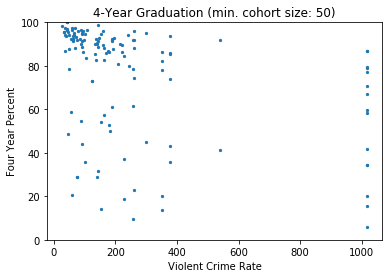

In [13]:
school_crime.plot(x= 'Violent Crime Rate',
                 y= 'Four Year Percent',
                 kind='scatter',
                 title=f'4-Year Graduation (min. cohort size: {min_cohort})',
                 marker='.',
                 ylim=(0,100))

### Minneapolis crime data by neighborhood

In [14]:
# Begin working with data for minneapolis crime by neighborhood
mpls_crime.head()

,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
1,2,** NOT ASSIGNED **,Arson,0.0,8,2017
2,3,** NOT ASSIGNED **,Auto Theft,3.0,8,2017
3,4,** NOT ASSIGNED **,Burglary,1.0,8,2017
4,5,** NOT ASSIGNED **,Homicide,0.0,8,2017


In [15]:
# Create table showing avg number crimes reported by type for each
    # neighborhood over last few years
mpls_crime_avg = mpls_crime.pivot_table(values='number',
                                         index='neighborhood',
                                         columns='ucrDescription')
mpls_crime_avg

ucrDescription,Aggravated Assault,Arson,Auto Theft,Burglary,Homicide,Larceny,Rape,Robbery
neighborhood,,,,,,,,
** NOT ASSIGNED **,2.250000,0.000000,2.333333,2.000000,0.000000,6.800000,1.571429,1.625000
ARMATAGE,1.000000,0.000000,1.000000,1.875000,0.000000,6.200000,0.500000,0.500000
AUDUBON PARK,1.000000,1.000000,2.571429,7.200000,0.500000,7.700000,0.500000,2.000000
Armatage,0.307692,0.000000,0.615385,1.692308,0.000000,4.923077,0.000000,0.076923
Audubon Park,0.769231,0.000000,2.076923,2.615385,0.000000,6.153846,0.538462,0.384615
BANCROFT,1.200000,0.000000,1.500000,4.666667,0.000000,2.900000,0.000000,1.250000
BELTRAMI,1.500000,0.000000,1.000000,1.000000,0.000000,2.222222,0.000000,1.000000
BOTTINEAU,0.750000,0.000000,1.444444,1.750000,0.000000,3.000000,0.666667,1.250000
BRYANT,1.400000,0.000000,1.166667,4.222222,0.000000,3.500000,0.000000,1.142857


In [16]:
# Create multi-index series -- Neighborhood --> Type of Crime --> Year Reported --> Avg. Number Reported
mpls_crime_year_groups = mpls_crime.groupby(['neighborhood', 'ucrDescription', 'reportYear'])['number'].mean()

# Display as a Dataframe
mpls_neighborhoods = mpls_crime_year_groups.unstack()
mpls_neighborhoods

reportYear                               2017       2018       2019
neighborhood         ucrDescription                                
** NOT ASSIGNED **   Aggravated Assault  2.40   2.000000        NaN
                     Arson               0.00        NaN        NaN
                     Auto Theft          2.25   2.400000        NaN
                     Burglary            2.00   2.000000        NaN
                     Homicide            0.00        NaN        NaN
                     Larceny             8.20   5.400000        NaN
                     Rape                1.50   1.666667        NaN
                     Robbery             1.00   2.000000        NaN
ARMATAGE             Aggravated Assault  1.00   1.000000        NaN
                     Arson               0.00        NaN        NaN
                     Auto Theft          1.00        NaN        NaN
                     Burglary            2.00   1.666667        NaN
                     Homicide            0.00        NaN        NaN
                     Larceny             8.00   4.400000        NaN
                     Rape                0.00   1.000000        NaN
                     Robbery             0.00   1.000000        NaN
AUDUBON PARK         Aggravated Assault  0.50   2.000000        NaN
                     Arson               1.00        NaN        NaN
                     Auto Theft          2.20   3.500000        NaN
                     Burglary            7.60   6.800000        NaN
                     Homicide            0.50        NaN        NaN
                     Larceny             9.00   6.400000        NaN
                     Rape                0.50   0.500000        NaN
                     Robbery             2.00        NaN        NaN
Armatage             Aggravated Assault   NaN   0.142857   0.500000
                     Arson                NaN   0.000000   0.000000
                     Auto Theft           NaN   0.428571   0.833333
                     Burglary             NaN   1.714286   1.666667
                     Homicide             NaN   0.000000   0.000000
                     Larceny              NaN   5.857143   3.833333
...                                       ...        ...        ...
Willard - Hay        Auto Theft           NaN   6.714286   4.500000
                     Burglary             NaN   5.857143   2.166667
                     Homicide             NaN   0.142857   0.000000
                     Larceny              NaN   9.714286  12.166667
                     Rape                 NaN   0.857143   0.833333
                     Robbery              NaN   1.857143   1.500000
Windom               Aggravated Assault   NaN   0.857143   0.833333
                     Arson                NaN   0.000000   0.166667
                     Auto Theft           NaN   1.571429   1.833333
                     Burglary             NaN   3.142857   3.000000
                     Homicide             NaN   0.000000   0.000000
                     Larceny              NaN   7.571429   7.166667
                     Rape                 NaN   0.285714   0.333333
                     Robbery              NaN   0.285714   0.666667
Windom Park          Aggravated Assault   NaN   0.857143   0.833333
                     Arson                NaN   0.000000   0.166667
                     Auto Theft           NaN   1.857143   2.166667
                     Burglary             NaN   2.142857   3.000000
                     Homicide             NaN   0.000000   0.000000
                     Larceny              NaN   5.857143   5.666667
                     Rape                 NaN   0.428571   0.333333
                     Robbery              NaN   0.571429   0.666667
Z_** NOT ASSIGNED ** Aggravated Assault   NaN   1.857143   0.833333
                     Arson                NaN   0.142857   0.000000
                     Auto Theft           NaN   1.714286   0.500000
                     Burglary             NaN   2.000000